# Introduction
**This notebook is an educational project exploring the Credit Card Fraud Detection dataset on Kaggle. It's designed to be a learning tool for understanding the process of building a machine learning model to detect fraudulent transactions.**

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import resample

from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score

from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

**I ran into an import error with the SMOTE library, but I've resolved it. The fix was to install it directly using pip, and I've included the installation command as a commented line in the notebook for anyone who might encounter the same issue.**

In [ ]:
#  !pip install imbalanced-learn

**I started by inspecting the dataset's contents. The df.info() command confirmed that all columns have a consistent number of entries and that there are no missing values, which was also verified by df.isnull().sum().max(). This is great news, as it means we don't need to perform any data imputation before we begin our analysis.**

In [7]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.info()
df.isnull().sum().max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0

# EDA


**To kick off the analysis, I've visualized the distribution of our target variable, 'Class'. The bar plot above clearly shows a significant class imbalance: a vast majority of the transactions are legitimate (Class 0), while fraudulent transactions (Class 1) are extremely rare. This imbalance is a critical challenge we'll need to address to build an effective fraud detection model.**

Text(0.5, 1.0, '0 : No fraud, 1 : Fraud')

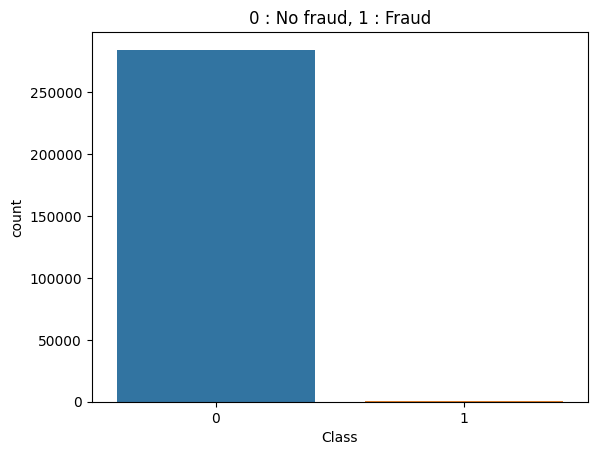

In [8]:
sns.countplot(df, x = 'Class')
plt.title("0 : No fraud, 1 : Fraud")

In [9]:
Counter(df["Class"])

Counter({0: 284315, 1: 492})

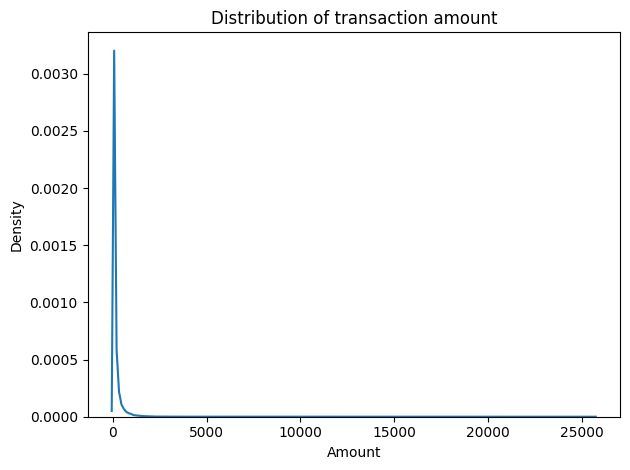

In [12]:
sns.kdeplot(df["Amount"])
plt.title("Distribution of transaction amount")
plt.tight_layout()
plt.show()

**The visualization above, shows the distribution of the 'Amount' column. As you can see, the vast majority of transactions have very small values, with a long tail extending towards larger amounts. This highly skewed distribution suggests that we'll need to scale or normalize this feature to ensure it doesn't disproportionately influence our model's performance.**

Text(0.5, 1.0, 'Transaction Amount by Class')

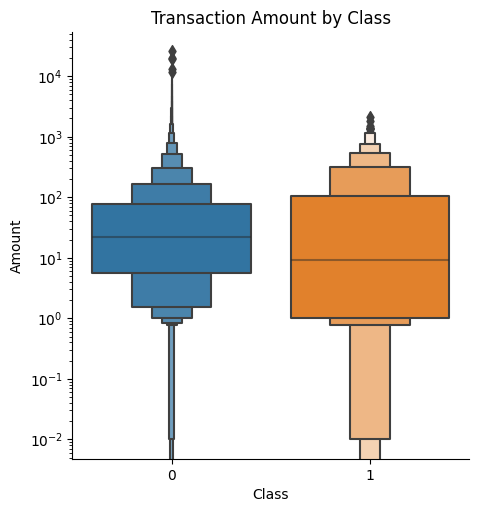

In [13]:
sns.catplot(df, x = 'Class', y = "Amount", kind = "boxen")
plt.yscale("log")
plt.title("Transaction Amount by Class")

**The boxen plot above, with a logarithmic y-axis, compares the transaction amounts for both fraudulent (Class 1) and non-fraudulent (Class 0) transactions. This plot is useful for seeing how the distributions differ.**

**Key Observations**
**Non-Fraudulent Transactions (Class 0): The majority of legitimate transactions have very small amounts. The box is concentrated at the lower end, showing that most transactions fall within a narrow, low-value range.**

**Fraudulent Transactions (Class 1): The median value for fraudulent transactions is slightly higher than for legitimate ones, and the overall spread is wider. This suggests that fraudulent transactions, while rare, don't necessarily involve extremely large amounts, as is often assumed. The distribution for fraudulent transactions is also more spread out, with a higher number of outliers at various price points.**

**This visualization highlights that 'Amount' is a distinguishing feature, and it will be important for our model to learn these subtle differences in the value distributions between the two classes.**

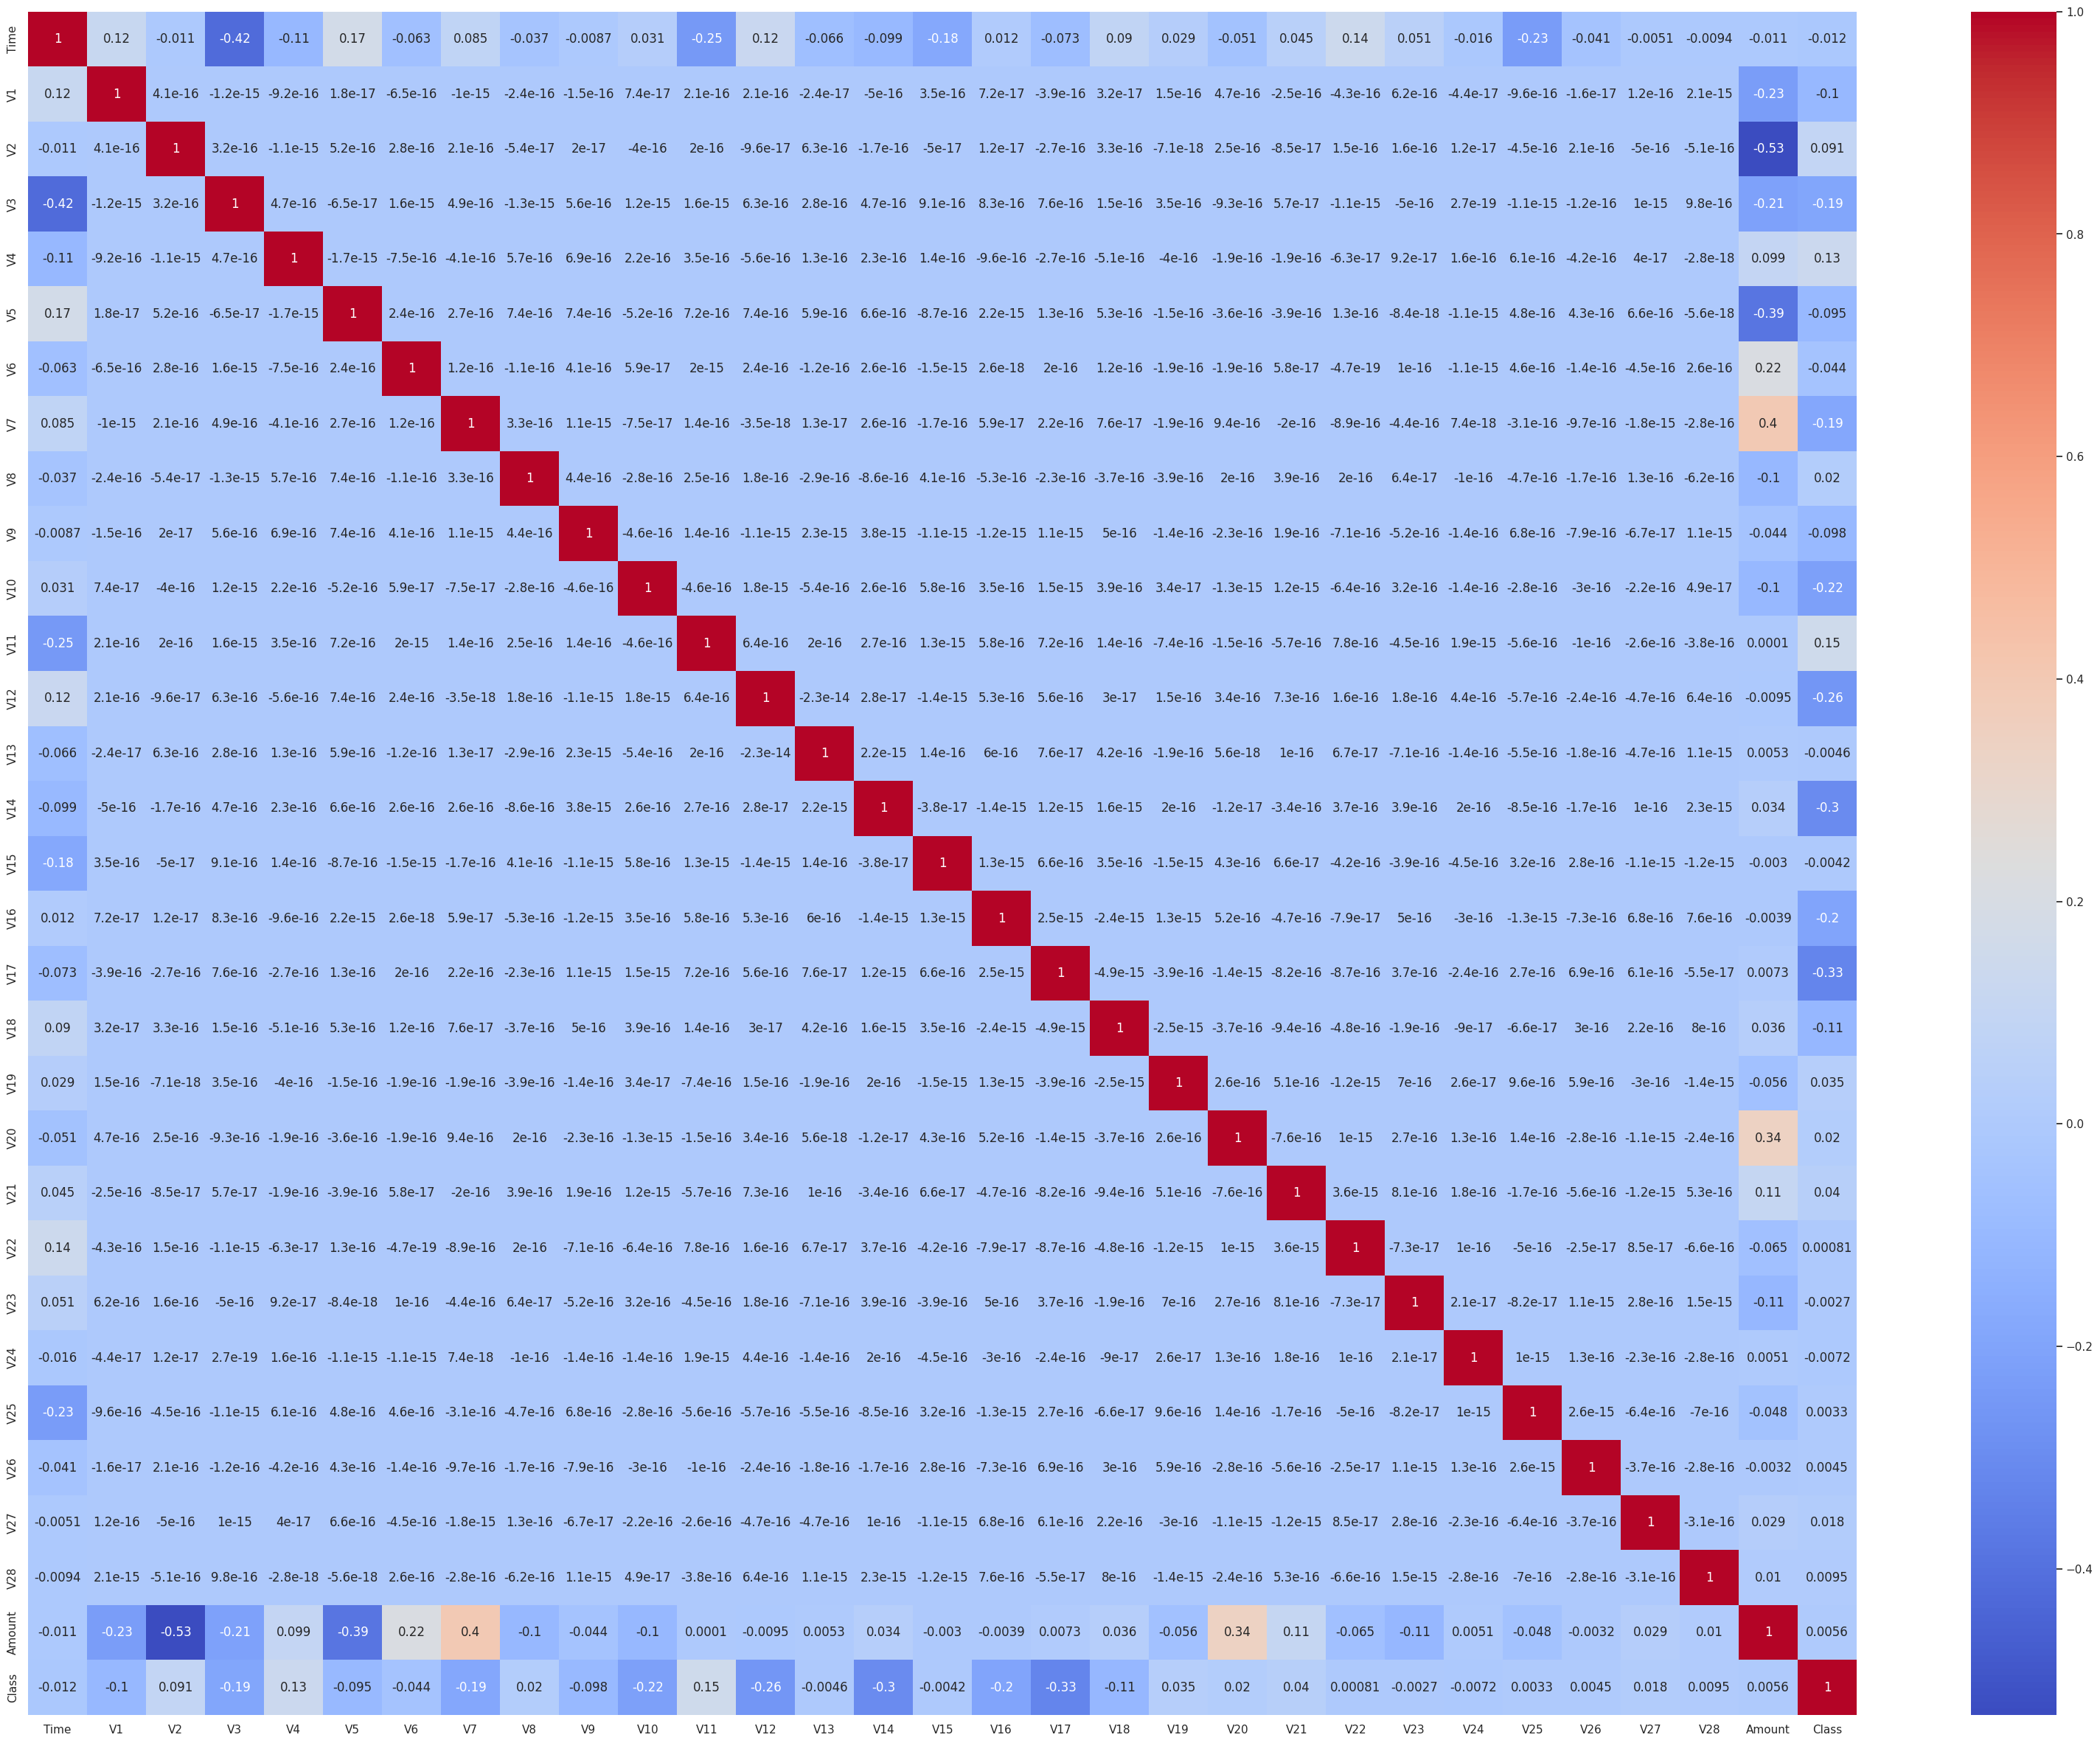

In [19]:
corrr = df.corr()
sns.heatmap(corrr, annot = True, cmap = 'coolwarm')
sns.set_theme(rc={'figure.figsize':(40, 40)})